In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score


In [2]:
# Import iris dataset
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Overview

In [3]:
print(f'Shape of data set:\n\n {df.shape} \n')
print('----'*10)
print(f'Values: \n\n {df.values} \n')
print('----'*10)
print(f'Columns: \n\n{df.columns}\n')
print('----'*10)
print('Short data analyse: \n')
df.describe()

Shape of data set:

 (150, 6) 

----------------------------------------
Values: 

 [[1 5.1 3.5 1.4 0.2 'Iris-setosa']
 [2 4.9 3.0 1.4 0.2 'Iris-setosa']
 [3 4.7 3.2 1.3 0.2 'Iris-setosa']
 [4 4.6 3.1 1.5 0.2 'Iris-setosa']
 [5 5.0 3.6 1.4 0.2 'Iris-setosa']
 [6 5.4 3.9 1.7 0.4 'Iris-setosa']
 [7 4.6 3.4 1.4 0.3 'Iris-setosa']
 [8 5.0 3.4 1.5 0.2 'Iris-setosa']
 [9 4.4 2.9 1.4 0.2 'Iris-setosa']
 [10 4.9 3.1 1.5 0.1 'Iris-setosa']
 [11 5.4 3.7 1.5 0.2 'Iris-setosa']
 [12 4.8 3.4 1.6 0.2 'Iris-setosa']
 [13 4.8 3.0 1.4 0.1 'Iris-setosa']
 [14 4.3 3.0 1.1 0.1 'Iris-setosa']
 [15 5.8 4.0 1.2 0.2 'Iris-setosa']
 [16 5.7 4.4 1.5 0.4 'Iris-setosa']
 [17 5.4 3.9 1.3 0.4 'Iris-setosa']
 [18 5.1 3.5 1.4 0.3 'Iris-setosa']
 [19 5.7 3.8 1.7 0.3 'Iris-setosa']
 [20 5.1 3.8 1.5 0.3 'Iris-setosa']
 [21 5.4 3.4 1.7 0.2 'Iris-setosa']
 [22 5.1 3.7 1.5 0.4 'Iris-setosa']
 [23 4.6 3.6 1.0 0.2 'Iris-setosa']
 [24 5.1 3.3 1.7 0.5 'Iris-setosa']
 [25 4.8 3.4 1.9 0.2 'Iris-setosa']
 [26 5.0 3.0 1.6 0.2 'Iri

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# function to identify missing value from all features
def missing_values (dataset):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False))
    missing_values= pd.concat([total,percent], axis=1, keys= ['Total', 'Percent'])
    return missing_values
print('Missing Values from Fire Forest data set')
print()
print (missing_values (df))

Missing Values from Fire Forest data set

               Total  Percent
Species            0      0.0
PetalWidthCm       0      0.0
PetalLengthCm      0      0.0
SepalWidthCm       0      0.0
SepalLengthCm      0      0.0
Id                 0      0.0


In [6]:
#create funcion to identify all numeric data
def numeric(data):
    numeric_cols = data.select_dtypes(np.number).columns.tolist()
    return data[numeric_cols].head(3)
print('Numeric features of data set are:')
print()
numeric_df= numeric(df)
print(numeric_df)

Numeric features of data set are:

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   1            5.1           3.5            1.4           0.2
1   2            4.9           3.0            1.4           0.2
2   3            4.7           3.2            1.3           0.2


In [7]:
#create funcion to identify all categorical data
def categoric(data):
    categoric_cols = data.select_dtypes(exclude=np.number).columns.tolist()
    return data[categoric_cols].head(3)
print('Categoric features of data set are:')
print()
categoric_df= categoric(df)
print(categoric_df)

Categoric features of data set are:

       Species
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa


# Exploratory Data Analysis

(5.5, -0.5)

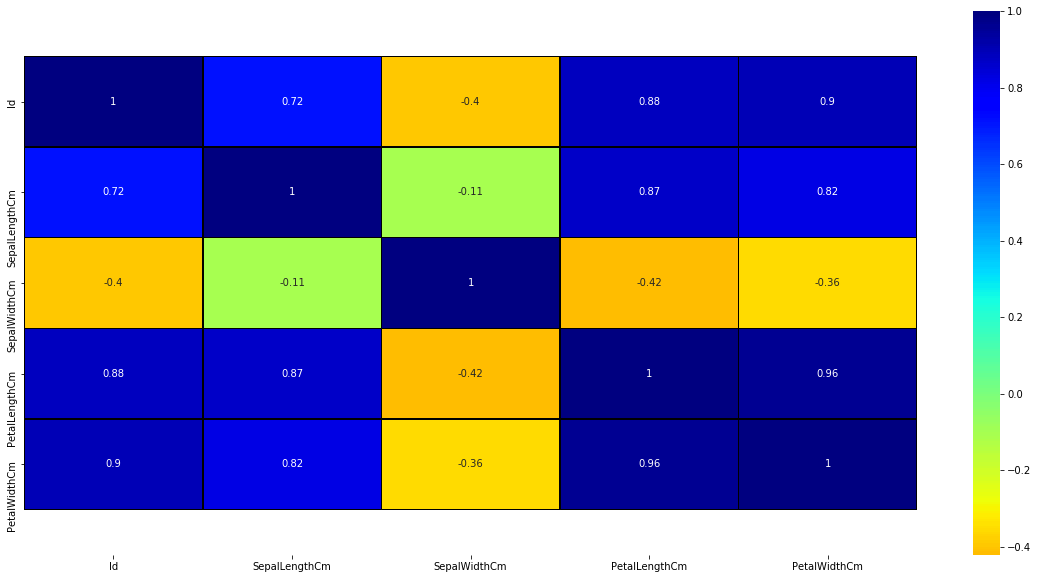

In [8]:
# correlation 
plt.figure(figsize=(20,10))
ax = sns.heatmap(df.corr(), annot=True, cmap='jet_r',annot_kws={'size': 10},
                linecolor='black', center=False,  linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) 

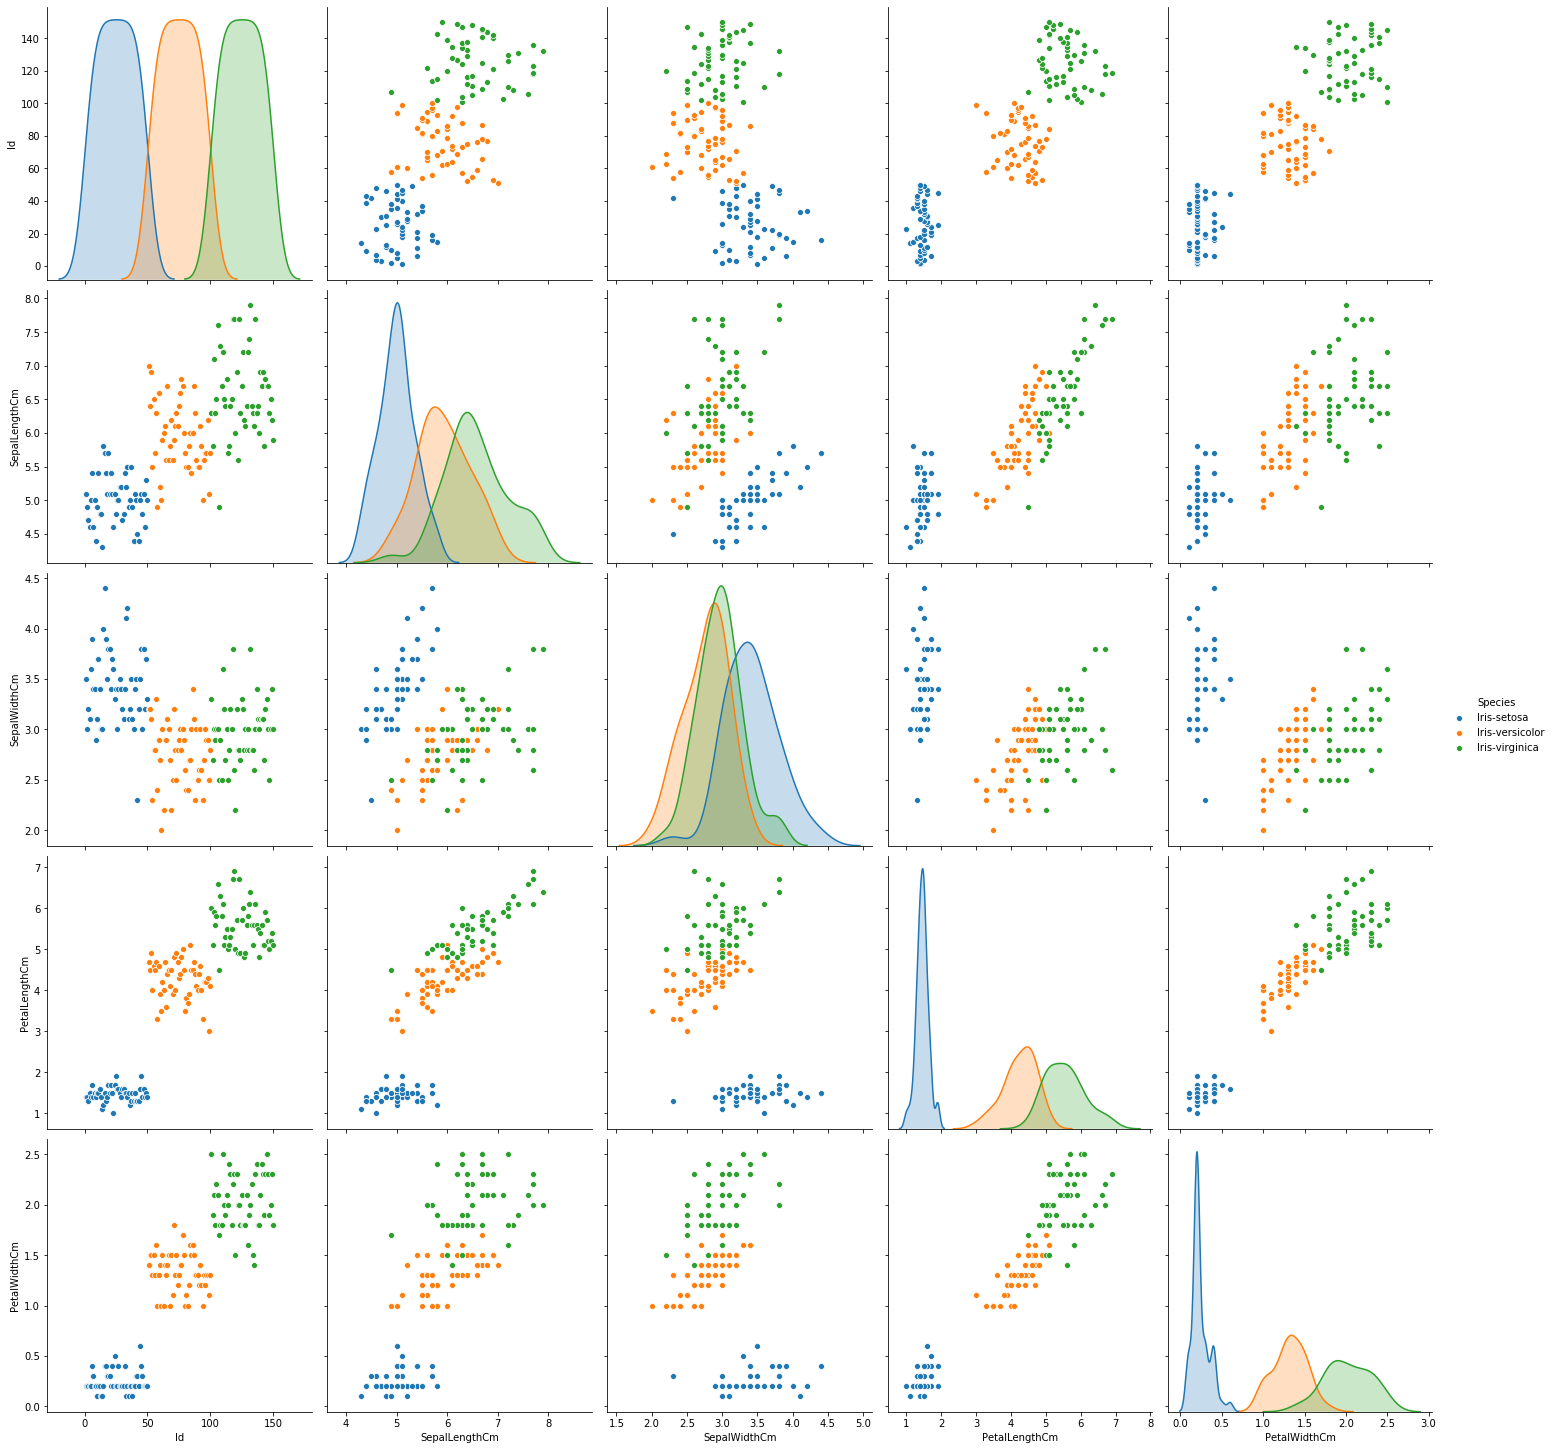

In [9]:
sns.pairplot(df, height=4, hue = 'Species')


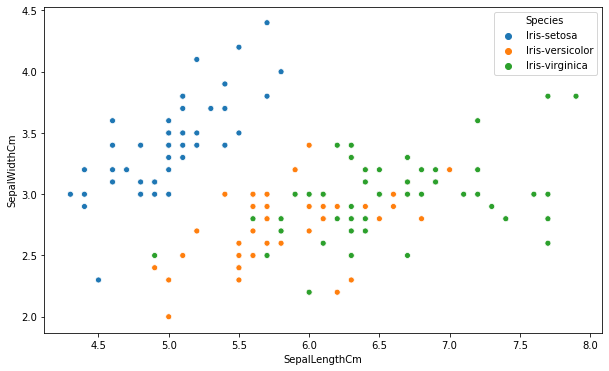

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')

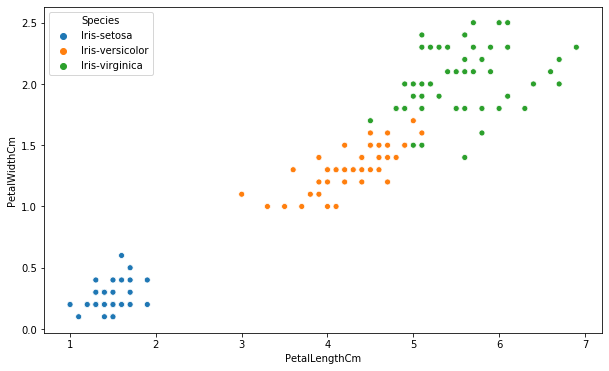

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species')

Strong correlation of sepal_length with sepal_width and petal_length

In [12]:
# Mapping Species 
df['Species']=df['Species'].map({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2 })
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [13]:
df_ml=df.drop(['Id',], axis=1)
df_ml.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
X = df_ml.drop(['Species'], axis=1)
y = df_ml['Species']
display(X.head(5))
display(y)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [16]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (135, 4)
y_train shape: (135,)
X_test shape: (15, 4)
y_test shape: (15,)


In [17]:
# First we will try to normalize data and than we will observe the distribution of data
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler()

# transform training data
X_train_norm = norm.fit_transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [18]:
# Distribution of normalized data train data
col_names = list(X.columns)
df_norm = pd.DataFrame(data = X_train_norm, columns = col_names)
df_norm.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.166667,0.458333,0.084746,0.000000
1,0.472222,0.375000,0.593220,0.583333
2,0.333333,0.250000,0.576271,0.458333


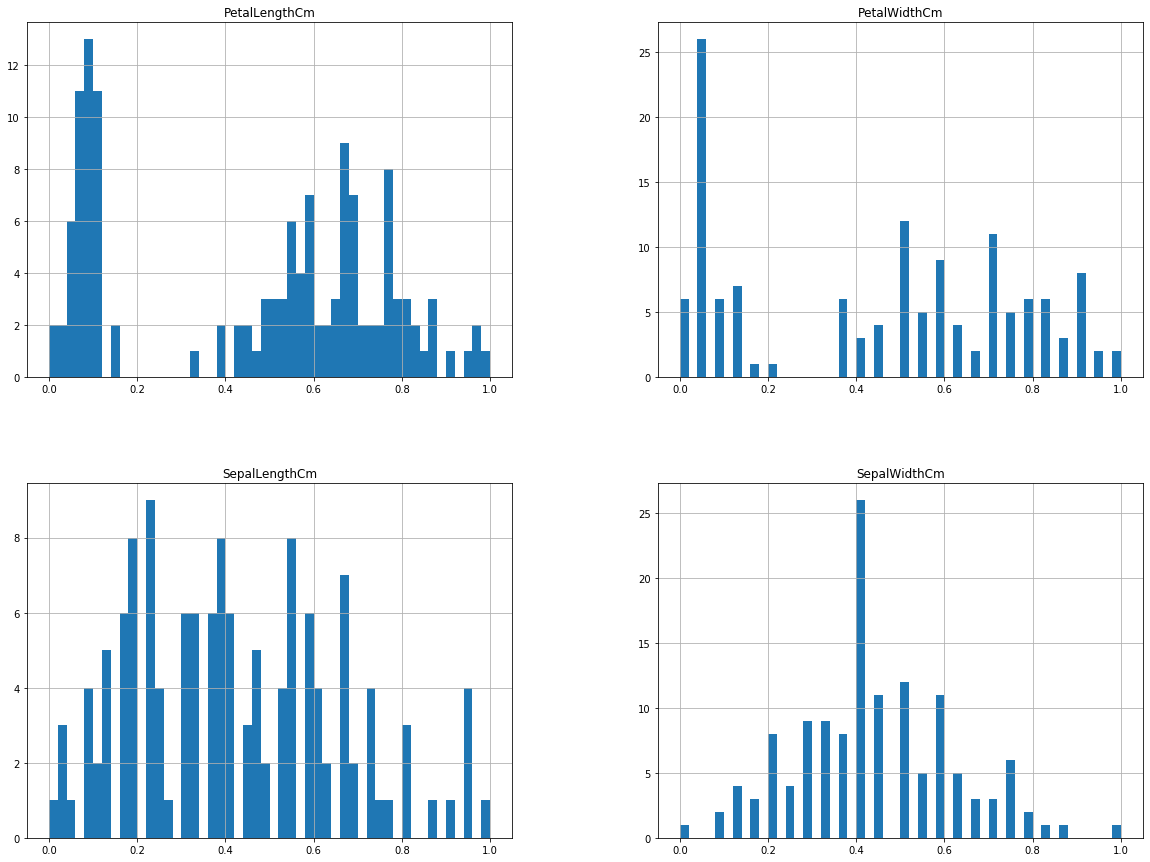

In [19]:
# Visualize normalized data
df_norm.hist(bins=50, figsize=(20,15))
plt.show()

In [20]:
# Second we will try to standardize data and than we will observe the distribution of data
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)


In [21]:
# Dist of standardized data
df_std = pd.DataFrame(data = X_train_std, columns = col_names)
df_std.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.085934,0.098137,-1.244486,-1.411480
1,0.221943,-0.366721,0.446278,0.406991
2,-0.372547,-1.064006,0.389919,0.017319


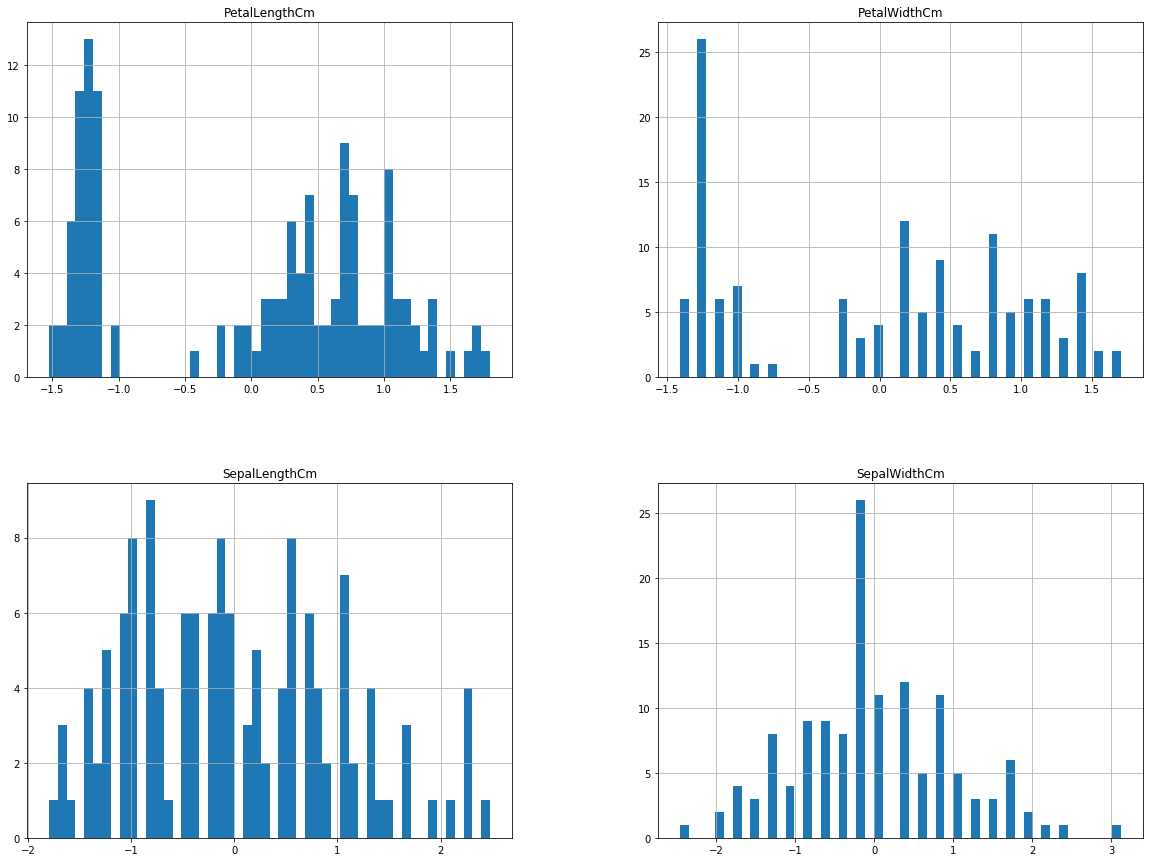

In [22]:
## Visualize standardized data
df_std.hist(bins=50, figsize=(20,15))
plt.show()

In [23]:
# Import scores 
from sklearn.metrics import accuracy_score
acc_scores = {}

In [24]:
# Define function to go through models
def models(model, X_train, y_train, X_test, y_test, model_name):
    reg = model
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    acc_scores[model_name] = accuracy_score(y_test, y_pred)
    print(f"Acc_score of {model_name}: {acc_scores[model_name]}\n")
    ROC[model_name]=roc_auc_score(y_test, y_pred)
    print(f"Roc_auc_score: {ROC[model_name]} \n ")
    return model

In [25]:
# First model Svc_linear
from sklearn.svm import SVC, NuSVC, LinearSVC
Svc_linear = SVC(kernel='linear', C=1)
model1 = models(Svc_linear, X_train_std, y_train, X_test_std, y_test, 'Svc_linear')


Acc_score of Svc_linear: 1.0



In [26]:
# Second model SVC_rbf
SVC_rbf = SVC()
model2 = models(SVC_rbf, X_train_std, y_train, X_test_std, y_test, 'SVC_rbf')

Acc_score of SVC_rbf: 1.0



In [27]:
# Third model RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier()
model3 = models(Rf, X_train_std, y_train, X_test_std, y_test, 'Ran_for_clf')


Acc_score of Ran_for_clf: 0.9333333333333333



In [28]:
# Fourth model LogisticRegression
from sklearn.linear_model import LogisticRegression
Log_reg = LogisticRegression(random_state=0)
model4 = models(Log_reg, X_train_std, y_train, X_test_std, y_test, 'Log_Reg')


Acc_score of Log_Reg: 1.0



Text(0, 0.5, 'Testing Accuracy')

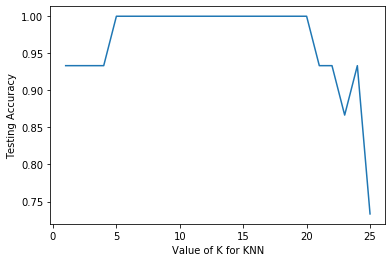

In [29]:
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_std,y_train)
        y_pred=knn.predict(X_test_std)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))


#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [30]:
# 5th model KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=k)
model5 = models(KNN, X_train_std, y_train, X_test_std, y_test, 'KNN')


Acc_score of KNN: 0.7333333333333333



In [31]:
# 6th XGBoost
import xgboost as xgb
Xg_class = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
model6 = models(Xg_class, X_train_std, y_train, X_test_std, y_test, 'Xg_class')


Acc_score of Xg_class: 0.9333333333333333



In [32]:
# 7th model SGDClassifier
from sklearn.linear_model import SGDClassifier
Sgd_class = SGDClassifier(max_iter=1000, tol=1e-3)
model7 = models(Sgd_class, X_train_std, y_train, X_test_std, y_test, 'Sgd_class')


Acc_score of Sgd_class: 0.9333333333333333



In [33]:
# 8th model DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
Dec_tree_class = DecisionTreeClassifier(random_state=0)
model8 = models(Dec_tree_class, X_train_std, y_train, X_test_std, y_test, 'Dec_tree_class')


Acc_score of Dec_tree_class: 1.0



In [34]:
# 9th model ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
extra_tree = ExtraTreeClassifier(random_state=0)
Bag_class_extra_tree = BaggingClassifier(extra_tree, random_state=0)
model9 = models(Bag_class_extra_tree, X_train_std, y_train, X_test_std, y_test, 'Bag_class_extra_tree')


Acc_score of Bag_class_extra_tree: 0.9333333333333333



In [35]:
# 10th model AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
Ada_class =AdaBoostClassifier()
model10 = models(Ada_class, X_train_std, y_train, X_test_std, y_test, 'Ada_class')


Acc_score of Ada_class: 0.9333333333333333



In [36]:
# Lets see the results of models
df_results = pd.DataFrame({'Models': list(acc_scores.keys()),
                          'Acc_Scores': list(acc_scores.values())})
df_results

,Models,Acc_Scores
0,Svc_linear,1.000000
1,SVC_rbf,1.000000
2,Ran_for_clf,0.933333
3,Log_Reg,1.000000
4,KNN,0.733333
5,Xg_class,0.933333
6,Sgd_class,0.933333
7,Dec_tree_class,1.000000
8,Bag_class_extra_tree,0.933333
9,Ada_class,0.933333


[Text(0, 0.5, 'Acc_Scores')]

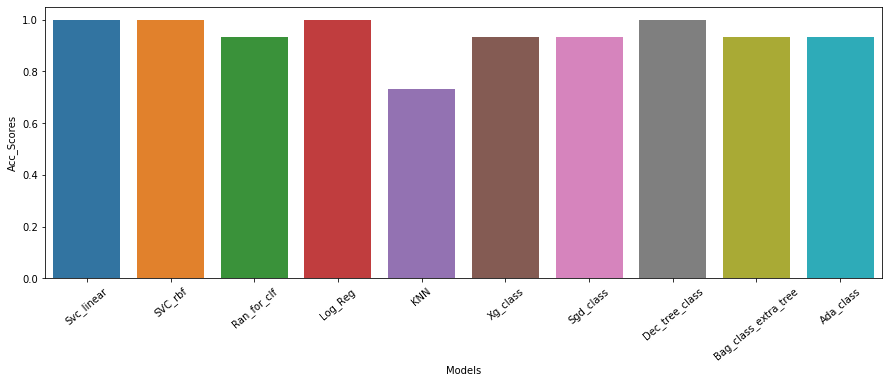

In [37]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x = "Models", y = "Acc_Scores", data = df_results)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
ax.set(ylabel = "Acc_Scores")

In [38]:
# Let see which model gives the best result
print(f"The model with best Acc_score is {max(acc_scores, key=acc_scores.get)} and it's Acc_score is {acc_scores[max(acc_scores, key=acc_scores.get)]:.3f}.")

The model with best Acc_score is Svc_linear and it's Acc_score is 1.000.


In [39]:
# At the end let see how good is our prediction
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check.head(5)

,Actual,Predicted
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0


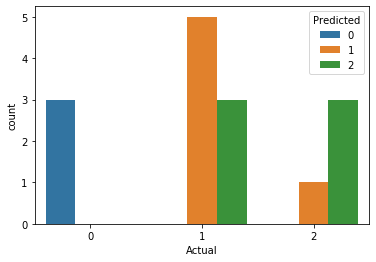

In [40]:
plot = sns.countplot(x = "Actual", hue='Predicted',data = df_check)

# THE END